## 2(a) Using scikit learn to learn a model

[[1 2]
 [2 4]
 [3 6]
 [4 8]]
[2 3 4 5]
Coefficients are
[0.2 0.4]


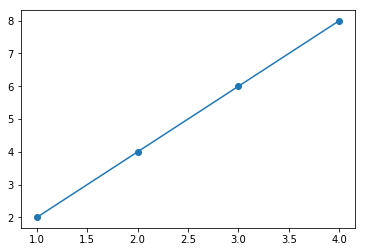

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
X=np.array([[1,2],[2,4],[3,6],[4,8]])
print(X)
Y=np.array([2,3,4,5])
print(Y)
#reg = LinearRegression().fit(X, Y)
lin_reg=LinearRegression().fit(X, Y)
scr=lin_reg.score
#print(scr)
C=lin_reg.coef_
print("Coefficients are")
print(C)
plt.scatter(X[:,0],X[:,1])
plt.plot(X[:,0],X[:,1])
plt.show()
#print(reg)

## 2(b) Normal Equation method

In [251]:
import numpy as np
from numpy.linalg import multi_dot
from sklearn.linear_model import LinearRegression
X=np.array([[1,1,2],[1,2,4],[1,3,6],[1,4,8]])
Y=np.array([2,3,4,5])
X_dash=X.transpose()
#print(X)
#print(X_dash)
X2=np.dot(X_dash,X)
X3=np.linalg.pinv(X2)
X4=np.dot(X3,X_dash)
X41=np.dot(X4,Y)
X42=multi_dot([X3,X_dash,Y])
print("Output feature are",X41)
print("Output feature are",X42)


Output feature are [1.  0.2 0.4]
Output feature are [1.  0.2 0.4]


### [ X(T) * X] is non-invertible because one row of the matrix can be written in form of the other row. Or we can say that both rows are same, and hence matrix is singular. 
### Scikit learn is calculating the PSEUDO-INVERSE of the matrix.

## 3(a) Scikit learn’s linear regression module for the real estate price prediction regression problem.

In [3]:
import pandas as pd
df = pd.read_csv("Real estate valuation data set.csv") # Import data
#df = df.ix[:,'SalesID':'ProductGroupDesc'] # Remove extraneous features
#df # Show our data
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [253]:
input_feat_df=df.iloc[:,1:7]
output_feat_df=df.iloc[:,7]
#print(output_feat_df)

In [254]:
Tr,Tc=df.shape

In [255]:
training_input_feat_df=input_feat_df.iloc[0:300,:]
#print(training_input_feat_df)  v
testing_input_feat_df=input_feat_df.iloc[301:414,:]
#print(testing_input_feat_df)    v
training_output_feat_df=output_feat_df.iloc[0:300]
#print(training_output_feat_df)
testing_output_feat_df=output_feat_df.iloc[301:414]
#print(testing_output_feat_df)

In [256]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(training_input_feat_df, training_output_feat_df)
output_price=reg.predict(testing_input_feat_df)


In [257]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(testing_output_feat_df, output_price))
print("RMS error is",rms)
print("Regression Coefficient is",reg.coef_)

RMS error is 0.06926152825288803
Regression Coefficient is [ 79.61312521  -0.11339107  -0.23627913   0.09261661  54.77249968
 -16.66945068]


### Larger coefficients show that it will have greater say in prediction of output. Thus any small change in it will result in more change in output

## 3 (c) standardze the dataset

In [260]:
#print(df)
def standardize_dataset(df):
    r,c=df.shape
    #df_new=np.zeros(df.shape)
    df_new=df
    #pd.Dataframe(data=df_new,index=np.array(range(1,r)),columns=np.array(range(1,c))
    for i in range(0,c):
        temp=df.iloc[:,i]
        m=temp.max()
        #print(m)
        temp=temp/m
        #print(temp)
        df_new.iloc[:,i]=temp
    #print(df_new)
    return df_new

In [261]:
df_new=standardize_dataset(df)
df_new.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.002415,0.999669,0.730594,0.013082,1.0,0.998736,0.999786,0.322553
1,0.004831,0.999669,0.445205,0.047256,0.9,0.998631,0.999780,0.359149
2,0.007246,1.000000,0.303653,0.086619,0.5,0.998915,0.999816,0.402553
3,0.009662,0.999959,0.303653,0.086619,0.5,0.998915,0.999816,0.466383
4,0.012077,0.999628,0.114155,0.060198,0.5,0.998592,0.999804,0.366809


In [262]:
input_feat_df_new=df_new.iloc[:,1:7]
output_feat_df_new=df_new.iloc[:,7]
#print(output_feat_df)

In [263]:
training_input_feat_df_new=input_feat_df_new.iloc[0:300,:]
#print(training_input_feat_df)  v
testing_input_feat_df_new=input_feat_df_new.iloc[301:414,:]
#print(testing_input_feat_df)    v
training_output_feat_df_new=output_feat_df_new.iloc[0:300]
#print(training_output_feat_df)
testing_output_feat_df_new=output_feat_df_new.iloc[301:414]
#print(testing_output_feat_df)

In [264]:
reg_new=LinearRegression().fit(training_input_feat_df_new, training_output_feat_df_new)
output_price_new=reg.predict(testing_input_feat_df_new)

In [266]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_new = sqrt(mean_squared_error(testing_output_feat_df_new, output_price_new))
print("RMS error is",rms_new)
print("Coefiicients are",reg_new.coef_)

RMS error is 0.06926152825288803
Coefiicients are [ 79.61312521  -0.11339107  -0.23627913   0.09261661  54.77249968
 -16.66945068]


### In the case of standardize dataset gradient descent should converge quickly. It should reduce variance


## 3(d) Residual distribution

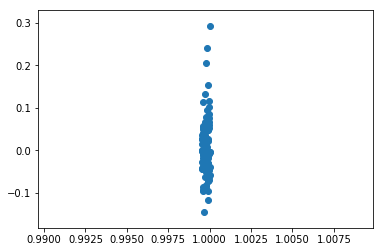

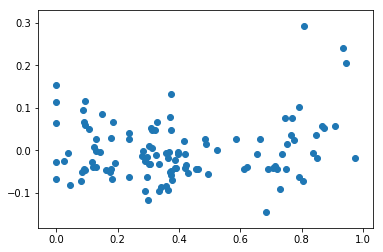

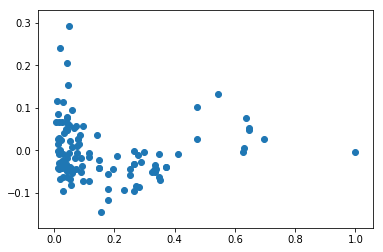

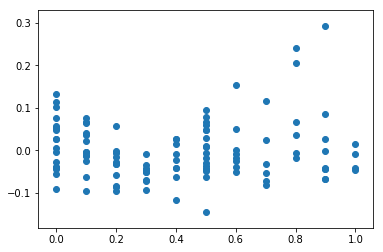

In [562]:
err=(testing_output_feat_df_new-output_price_new)
#print(err)
for i in range(0,4):
    #plt.scatter(input_feat_df.iloc[0:300,0],err)
    plt.scatter(testing_input_feat_df.iloc[:,i],err)
    plt.show()

### The distribution of residual is random.  Ideally it should be normal.

### 3(e) cross-validation

In [590]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
#from sklearn.metrics.scorer import make_scorer
#from sklearn.metrics import confusion_matrix
#from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
X=df.iloc[:,1:4]
y = diabetes.target[:150]
y=df.iloc[:,7]
lasso = linear_model.Lasso()
#print(diabetes)

In [623]:
cv_results = cross_validate(lasso, X, y, cv=5,return_train_score=True,return_estimator=True)
x1=np.max(cv_results['test_score'])
print(x1)
#print(cv_results['test_score']) 
cv_results2 = cross_validate(lasso, X.iloc[:,1:4], y, cv=4,return_train_score=True,return_estimator=True)
print(np.max(cv_results2['test_score'])) 
cv_results3 = cross_validate(lasso, X.iloc[:,1:3], y, cv=3,return_train_score=True,return_estimator=True)
print(np.max(cv_results3['test_score'])) 
cv_results4 = cross_validate(lasso, X.iloc[:,1:2], y, cv=2,return_train_score=True,return_estimator=True)
print(np.max(cv_results4['test_score'])) 


-0.0015382157453345258
-7.464715666616328e-05
-0.0008139426809699034
-0.0017694886366583784


### It is minimum for 4 features

### 3(e) (ii): Stepwise Forward selection

In [712]:
list_of_in=[]
temp_var=[]

final_list=[]
#print(training_input_feat_df_new.iloc[:,1])
#reg_new=LinearRegression().fit(training_input_feat_df_new.iloc[:,1], training_output_feat_df_new)
for j in range(1,5):
    for i in range(1,5):
            error=[]
        #if i not in final_list:
            temp_var.append(i)
            reg_new=LinearRegression().fit(training_input_feat_df_new.iloc[:,temp_var], training_output_feat_df_new)
            temp_var.pop()
            output_price_new=reg.predict(testing_input_feat_df_new)
            rms_new = sqrt(mean_squared_error(testing_output_feat_df_new, output_price_new))
            #print(rms)
            error.append(rms_new)
            v,k=min((v,k) for (k,v) in enumerate(error))
            final_list.append(i)
    print(final_list)

[1, 2, 3, 4]
[1, 2, 3, 4, 1, 2, 3, 4]
[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]


   ## Question Number 4
   

### Qn no 4(a) Normal Equation

In [127]:
import pandas as pd
df2 = pd.read_csv("Real estate valuation data set.csv") # Import data
#df = df.ix[:,'SalesID':'ProductGroupDesc'] # Remove extraneous features
#df # Show our data
df2.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [281]:

def normalEquationRegression(df):
    #X=np.array([[1,1,2],[1,2,4],[1,3,6],[1,4,8]])
    X=df2.iloc[:,1:7]
    Y=df2.iloc[:,7]
    X_dash=X.transpose()
    #print(X)
    #print(X_dash)
    X2=np.dot(X_dash,X)
    X3=np.linalg.pinv(X2)
    X4=np.dot(X3,X_dash)
    X41=np.dot(X4,Y)
    X42=multi_dot([X3,X_dash,Y])
    #print("Output feature are",X41)
    print("Output feature are",X42)
    return X42

In [645]:
import time
start = time.clock()
out_feat=normalEquationRegression(df)
t1=(time.clock()-start)

Output feature are [ 3.74005219e+00 -2.70810191e-01 -5.49449021e-03  1.12902867e+00
  2.03314224e+02 -1.03360354e+02]


F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [647]:
error_normal=np.sum(((df2.iloc[:,1:7]@out_feat)-df2.iloc[:,7])**2)/len(df2)
print("error for normal equation is",error_normal)
print("time taken is",t1)

error for normal equation is 77.99210449988091
time taken is 0.012805227073840797


## 4(b) Gradient Descent

In [631]:
df2.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [648]:
start=time.clock()
r2,c2=df2.shape
list_of_feat=np.ones(c2-2) #making initial guesses
print("list of feat",list_of_feat)
y=df.iloc[:,-1]  #output
print("y shape",y.shape)
input_feat=df2.iloc[:,1:c2-1]
input_feat=input_feat.values

#input_feat[:]=1
#print("input_feat",input_feat)
inputT=np.transpose(input_feat)
print("inputT shape",inputT.shape)

for i in range(1,1000):
#error=((np.dot(input_feat,list_of_feat)))
    temp=input_feat-((np.dot(inputT,(np.dot(input_feat,list_of_feat)- y)))*(0.0001/r2))
    input_feat=temp

#print(input_feat)

for i in range(1,1000):
#error=((np.dot(input_feat,list_of_feat)))
    temp=list_of_feat-((np.dot(inputT,(np.dot(input_feat,list_of_feat)- y)))*(0.00000001/r2))
    list_of_feat=temp
    #print(temp)
print(list_of_feat)
t2=time.clock()-start
#input_feat=(np.dot(inputT,(np.dot(input_feat.values,np.transpose(list_of_feat)- y)))*(0.01/r2)

#for i in range(1,100):
#    list_of_feat=list_of_feat-(np.sum((np.dot(input_feat.values,list_of_feat))-y)*input_feat.iloc[:,:])#i,j
#print(list_of_feat)

F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


list of feat [1. 1. 1. 1. 1. 1.]
y shape (414,)
inputT shape (6, 414)
[-0.07996699  0.98909753  0.00112964  0.99831466  0.98660758  0.93480718]


F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [659]:
error_grad=np.sum(((df2.iloc[:,1:7]@list_of_feat)-df2.iloc[:,7])**2)/len(df2)
print("Mean Square Error for gradient descent is",error_grad)
print("time taken for gradient is",t2)

Mean Square Error for gradient descent is 1783.7846399639957
time taken for gradient is 1.3132249260088429


In [652]:
#normalEquationRegression(input_feat)

### 4(c) Autograd

In [661]:
import autograd 
#import grad from autograd
from autograd import grad
start=time.clock()
r2,c2=df2.shape
list_of_feat2=np.ones(c2-2) #making initial guesses
print("list of feat",list_of_feat2)
y=df.iloc[:,-1]  #output
print("y shape",y.shape)
input_feat=df2.iloc[:,1:c2-1]
input_feat=input_feat.values

#input_feat[:]=1
#print("input_feat",input_feat)
inputT=np.transpose(input_feat)
print("inputT shape",inputT.shape)

def cost(list_of_feat2,input_feat,y):
    #cst=(np.dot(input_feat,list_of_feat)- y)**2
    cst=((np.sum(np.square(np.dot(input_feat,list_of_feat2)-y)))/(2*r2))
    return cst

diff_cost=grad(cost)
for i in range(1,100):
#error=((np.dot(input_feat,list_of_feat)))
    #temp=list_of_feat-((np.dot(inputT,(np.dot(input_feat,list_of_feat)- y)))*(0.000000001/r2))
    temp=list_of_feat2-0.0000001*diff_cost(list_of_feat2,input_feat,y)
    #print("temp is",temp)
    #print("mannual is",(np.sum(np.square(np.dot(input_feat,list_of_feat)-y)))/(2*r2))
    list_of_feat2=temp
print(temp)
t3=time.clock()-start
print(list_of_feat)



F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


list of feat [1. 1. 1. 1. 1. 1.]
y shape (414,)
inputT shape (6, 414)
[-0.07985289  0.98911044  0.00113046  0.99831567  0.986609    0.93481407]
[-0.07985289  0.98911044  0.00113046  0.99831567  0.986609    0.93481407]


F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [662]:
error_grad=np.sum(((df2.iloc[:,1:7]@list_of_feat2)-df2.iloc[:,7])**2)/len(df2)
print("Mean Square Error for autograd is",error_grad)
print("time taken for gradient is",t3)

Mean Square Error for autograd is 1783.7846399639957
time taken for gradient is 83.75561231002212


## Qn No 5

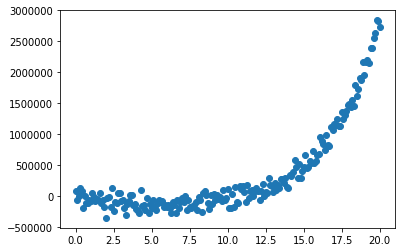

In [323]:
import numpy as np
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + np.random.randn(len(x))*1e5
plt.scatter(x,y)
plt.show()

### Question No 5: for p=5

Output Coefficents are [-6.30939906e+03 -2.52719053e+04  6.27056363e+03 -5.87613548e+02
  2.44062138e+01 -3.32791161e-01]


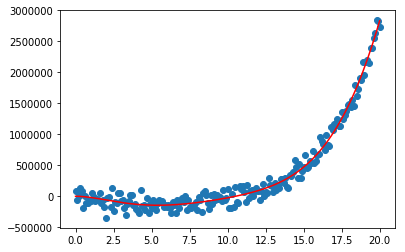

In [365]:
#print(x)
import numpy as np
in_data=np.ones((len(x),6),dtype=float)
#print(in_data)
for i in range(1,6):
    in_data[:,i]=x**(i+1)
in_data2=in_data[:,0:6]
#print(in_data2)
#print(in_data)
#np.dot(in_data2.transpose(),in_data2)
np.linalg.pinv(np.dot(in_data2.transpose(),in_data2))
x5=np.dot((np.dot((np.linalg.pinv(np.dot(in_data2.transpose(),in_data2))),in_data2.transpose())),y)

print("Output Coefficents are",x5)


#example check-----------------
in_data3=np.ones((len(in_data),7),dtype=float)
in_data3[:,0:6]=in_data
#print(in_data3)
in_data3[:,6]=y
#print(y)
y_pred5=np.dot(in_data2,x5)
#plt.scatter(in_data[:,1],y)
plt.scatter(x,y)
#plt.plot(in_data[:,1],y_pred5,'r')
plt.plot(x,y_pred5,'r')
plt.show()

In [363]:
'''x52=normalEquationRegression(in_data3)
y_pred52=np.dot(in_data2,x52)
plt.scatter(in_data[:,1],y)
plt.plot(in_data[:,1],y_pred52,'r')
plt.show()
print(y_pred52) '''

"x52=normalEquationRegression(in_data3)\ny_pred52=np.dot(in_data2,x52)\nplt.scatter(in_data[:,1],y)\nplt.plot(in_data[:,1],y_pred52,'r')\nplt.show()\nprint(y_pred52) "

### Qn 5: For p=4

[-3.95215474e+04 -1.37730165e+04  2.83871094e+03 -2.03316728e+02
  5.69732934e+00]


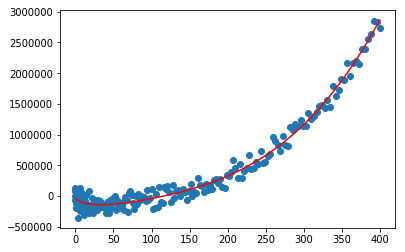

In [338]:
in_data2=in_data[:,0:5]
#print(in_data2)
x4=np.dot((np.dot((np.linalg.pinv(np.dot(in_data2.transpose(),in_data2))),in_data2.transpose())),y)
y_pred4=np.dot(in_data2,x4)
print(x4)
plt.scatter(in_data2[:,1],y)

plt.plot(in_data[:,1],y_pred4,'r')
plt.show()

## Qn No 6(A): Contour plotting 

theta is [[0]
 [0]]
x is [[1 1]
 [1 3]
 [1 6]]
y is [[ 6]
 [10]
 [16]]
[[2.31040000e+02 1.87142400e+02 2.25426869e+02 2.13304510e+02
  2.32365956e+02]
 [1.39764938e+02 1.78014894e+02 1.44192064e+02 1.54188695e+02
  1.38737012e+02]
 [1.83057207e+01 7.60942442e+00 1.67505268e+01 1.35679267e+01
  1.86803158e+01]
 [3.35358240e+01 5.34509015e+01 3.57220202e+01 4.07818159e+01
  3.30332709e+01]
 [1.16643331e-03 2.20774105e+00 2.29900470e-02 3.14607425e-01
  6.03847954e-03]]


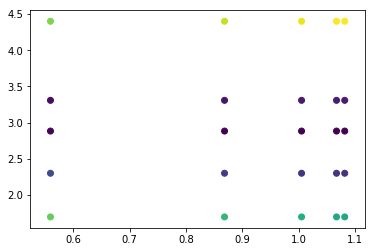

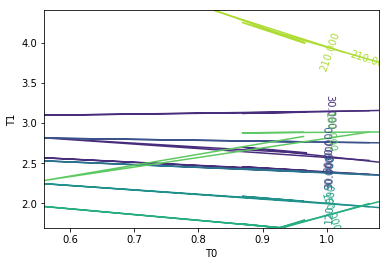

In [567]:
import pprint
x=((np.array([[1,1,1],[1,3,6]])).transpose())
y=(np.array([[6,10,16]])).transpose()
theta=(np.array([[0,0]])).transpose()
theta0=np.zeros((1,5), dtype=float)
theta1=np.zeros((1,5), dtype=float)
final=np.zeros((5,5),dtype=float)
#print(theta0)
print("theta is",theta)
print("x is",x)
print("y is",y)
for i in range(1,6):
    error=((x@theta)-y)
    #print(error)
    temp=theta-(((x.transpose())@error)*0.1/3)
    theta=temp
    theta0[0,i-1]=theta[0]
    theta1[0,i-1]=theta[1]
    
#print("theta0 is",theta0)
    #print("theta is",theta)
#print(theta)
#print(theta0)
a1,a2=np.meshgrid(theta0,theta1)
#print("initial a1",a1)
for i in range(0,5):
    for j in range(0,5):
        t1=((np.array([[a1[i,j],a2[i,j]]])).transpose())
        #print("a1",t1)
        t2=((np.dot(x,t1)))
        t3=(t2-y)
        final[i,j]=((t3.sum())**2)
        
        #print("t3 is",t3)
        
        #print(t1)
#print(a1)
#print(a2)
print(final)
cm = plt.cm.get_cmap('viridis')
plt.scatter(a1, a2, c=final, cmap=cm)
plt.show()
cp = plt.contour(a1, a2, final)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('T0')
plt.ylabel('T1')
plt.show()


theta is [[0]
 [0]]
x is [[1 1]
 [1 3]
 [1 6]]
y is [[ 6]
 [10]
 [16]]
[[744.1984     729.38885184 716.84845635 706.18386999 697.07342629
  689.2531533  682.50576001 676.65190213 671.54321132 667.05669876]
 [556.49858449 543.70217909 532.88250573 523.69313291 515.85176737
  509.12748308 503.33072446 498.30542565 493.92275592 490.0761245 ]
 [420.10739284 408.99891056 399.62197972 391.66950233 384.89219763
  379.08684701 374.08714973 369.75655773 365.98262167 362.67249973]
 [320.52086195 310.82735237 302.65986127 295.74426359 289.85895275
  284.82393701 280.49240999 276.74418527 273.48054586 270.62017561]
 [247.41847939 238.91086132 231.75700413 225.71041746 220.57268848
  216.18329198 212.41175982 209.1516183  206.31565956 203.83222712]
 [193.44284557 185.92885698 179.62429884 174.30583523 169.7944868
  165.94603886 162.64371269 159.79252413 157.31490856 155.14730308]
 [153.33751311 146.65579406 141.06261349 136.35402976 132.36734115
  128.9719947  126.06267806 123.55403076 121.37656541

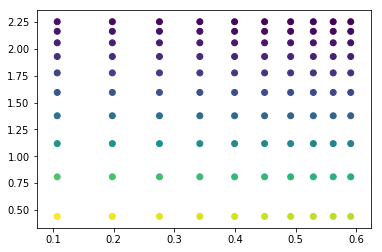

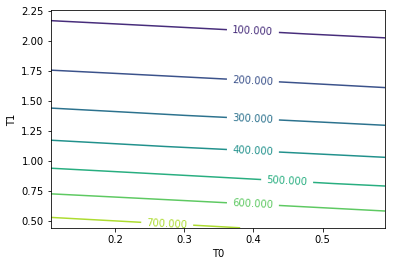

In [575]:
import pprint
x=((np.array([[1,1,1],[1,3,6]])).transpose())
y=(np.array([[6,10,16]])).transpose()
theta=(np.array([[0,0]])).transpose()
theta0=np.zeros((1,10), dtype=float)
theta1=np.zeros((1,10), dtype=float)
final=np.zeros((10,10),dtype=float)
#print(theta0)
print("theta is",theta)
print("x is",x)
print("y is",y)
for i in range(1,11):
    error=((x@theta)-y)
    #print(error)
    temp=theta-(((x.transpose())@error)*(0.01/3))
    theta=temp
    theta0[0,i-1]=theta[0]
    theta1[0,i-1]=theta[1]
    
#print("theta0 is",theta0)
    #print("theta is",theta)
#print(theta)
#print(theta0)
a1,a2=np.meshgrid(theta0,theta1)
#print("initial a1",a1)
for i in range(0,10):
    for j in range(0,10):
        t1=((np.array([[a1[i,j],a2[i,j]]])).transpose())
        #print("a1",t1)
        t2=((np.dot(x,t1)))
        t3=(t2-y)
        final[i,j]=((t3.sum())**2)
        
        #print("t3 is",t3)
        
        #print(t1)
#print(a1)
#print(a2)
print(final)
cm = plt.cm.get_cmap('viridis')
plt.scatter(a1, a2, c=final, cmap=cm)
plt.show()
cp = plt.contour(a1, a2, final)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('T0')
plt.ylabel('T1')
plt.show()


   ## 6(b) Animation

## 3(e).(ii)

In [560]:
import autograd 
#import grad from autograd
from autograd import grad

r2,c2=df2.shape
list_of_feat=np.ones(c2-2) #making initial guesses
print("list of feat",list_of_feat)
y=df.iloc[:,-1]  #output
print("y shape",y.shape)
input_feat=df2.iloc[:,1:c2-1]
input_feat=input_feat.values

#input_feat[:]=1
#print("input_feat",input_feat)
inputT=np.transpose(input_feat)
print("inputT shape",inputT.shape)

def cost(list_of_feat,input_feat,y):
    #cst=(np.dot(input_feat,list_of_feat)- y)**2
    cst=((np.sum(np.square(np.dot(input_feat,list_of_feat)-y)))/(2*r2))
    return cst

diff_cost=grad(cost)
for i in range(1,100):
#error=((np.dot(input_feat,list_of_feat)))
    #temp=list_of_feat-((np.dot(inputT,(np.dot(input_feat,list_of_feat)- y)))*(0.00000001/r2))
    temp=list_of_feat-0.00001*diff_cost(list_of_feat,input_feat,y)
    #print("temp is",temp)
    #print("mannual is",(np.sum(np.square(np.dot(input_feat,list_of_feat)-y)))/(2*r2))
    list_of_feat=temp
print(temp)
#print(list_of_feat)

list of feat [1. 1. 1. 1. 1. 1.]
y shape (414,)
inputT shape (6, 414)


F:\Anacondaa\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in multiply
  return f_raw(*args, **kwargs)
F:\Anacondaa\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square


[-1.32386820e+173 -1.17119732e+171 -9.88454881e+172 -2.30473976e+170
 -1.64182511e+171 -7.99187018e+171]


###  I discussed the assignment with ashish Kumar, Shubham Garg, Deepanshu Singh